# Risk and return models

In this notebook, I compared how well the different investment portfolio, can give the worst case in sharp ratio robust(Best worst case)
## Risk models

In [1]:

# Import the python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize


         solar      wind      coal       gas   nuclear
0    -0.040818  0.162311  0.028001 -0.031889  0.184670
1    -0.019875  0.036447  0.010455  0.028753  0.063038
2     0.047742  0.022538  0.002101 -0.023900  0.244681
3    -0.113737 -0.033140  0.035469  0.012969 -0.030304
4     0.078097  0.096668  0.027605  0.079185  0.157026
...        ...       ...       ...       ...       ...
8755 -0.092623  0.016607 -0.024257  0.103582 -0.227713
8756  0.088693 -0.018755  0.031550 -0.028946  0.071137
8757  0.090560  0.083966 -0.029677  0.071288  0.021110
8758  0.040637  0.039072  0.095309  0.127167  0.010383
8759  0.063095 -0.019349  0.015454  0.070998  0.213371

[8760 rows x 5 columns]


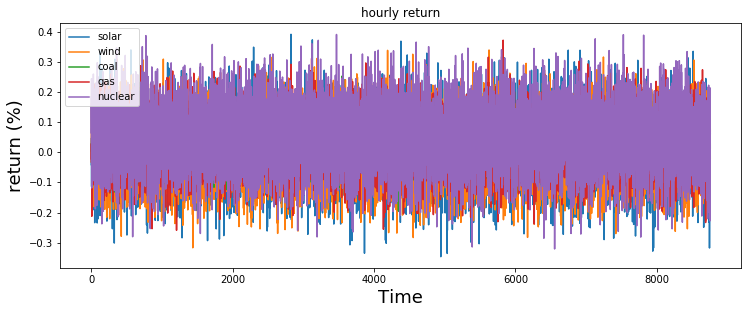

In [2]:
# Import data
df = pd.read_csv('ret.csv', delimiter = ',')
print(df)
returns = df.fillna(0)
englist = list(returns.columns)
labels = 'solar', 'wind','coal','gas','nuclear'


# Creat data plot 
# # Create the title 
title = 'hourly return'

#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) 
for c in returns.columns.values:
  plt.plot(returns[c],  label=c)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.title(title)
plt.xlabel('Time',fontsize=18)
plt.ylabel('return (%)',fontsize=18)
plt.legend(returns.columns.values, loc='upper left')
plt.show()


If equal weighted:
Expected annual return : 3.5999999999999996%
Annual volatility/risk : 3.8%
Sharp ratio:  0.95
Alocation: 


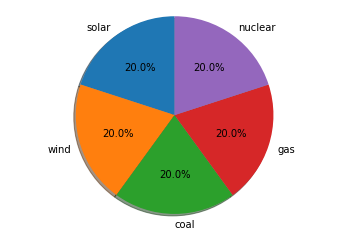

In [3]:
### returns = df.pct_change()
# Assign an initial guess
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
cov_matrix_annual = returns.cov(min_periods=8760)

# mean return
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
# risk of return
port_volatility = np.sqrt(port_variance)
# sharp ratio
portfolioSimpleAnnualReturn = np.sum(returns.mean()*weights)*1.5

# round the data
percent_var = str(np.sum((returns.mean()*weights)) * 100) + '%'
percent_vols = str(round(port_volatility, 3) * 100) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn,3)*100)+'%'


print('If equal weighted:')
print("Expected annual return : "+ percent_ret)
print('Annual volatility/risk : '+percent_vols)
print('Sharp ratio: ',round(portfolioSimpleAnnualReturn/port_volatility,2))
print('Alocation: ')
sizes = weights.tolist()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


In [4]:
def get_return_volatility_sharpRatio(weights):
    weights = np.array(weights)
    ret = np.sum((returns.mean()*weights))*1.5
    vol = np.sqrt(np.dot(weights.T,np.dot(cov_matrix_annual, weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

# minimize negative Sharpe Ratio change the max problem to min
def neg_sharpe(weights):
    return get_return_volatility_sharpRatio(weights)[2] * -1

# check allocation sums to 1 if use this constraint then results is the most optimal case
def check_sum(weights):
    return np.sum(weights) - 1

# make implicit constraints sharp ratio minimal
def check_SR(weights):
    return get_return_volatility_sharpRatio(weights)[2] - 1.05

### Robust optimal(Best worst case with implicit constraints)

Sharp ratio opt results:  1.05
Expected annual return :  4.0 %
Annual volatility/risk :  3.8 %
Sharp ratio:  1.05
Alocation: 


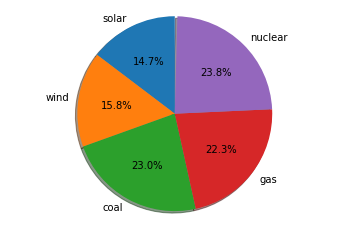

In [5]:
# create constraint variable
cons = ({'type':'eq','fun':check_SR})
# create weight boundaries
bounds = ((0,1),(0,1),(0,1),(0,1),(0,1))

# initial guess
init_guess = [0.2, 0.2, 0.2, 0.2, 0.2]
opt_results = minimize(neg_sharpe, init_guess, method='SLSQP', bounds=bounds, constraints=cons)
Alocation = opt_results['x']
print('Sharp ratio opt results: ',round(opt_results['fun']*(-1),2))

#print('Alocation: ')
#for i in range(len(englist)):
#    print(englist[i],'{:2.2%}'.format(Alocation[i]))          

resluts = get_return_volatility_sharpRatio(opt_results['x'])
print("Expected annual return : ",round(resluts[0],3)*100, '%')
print('Annual volatility/risk : ',round(resluts[1],3)*100, '%')
print('Sharp ratio: ',round(resluts[2],3))


print('Alocation: ')
sizes = Alocation.tolist()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Best case(without implicit constraints)

Sharp ratio opt results:  1.14
Expected annual return :  4.3 %
Annual volatility/risk :  3.6999999999999997 %
Sharp ratio:  1.143
Alocation: 


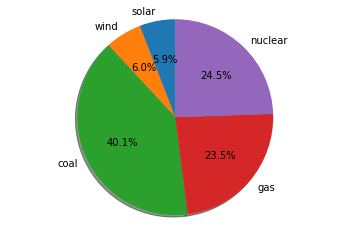

In [6]:
# create constraint variable
cons = ({'type':'eq','fun':check_sum})
# create weight boundaries
bounds = ((0,1),(0,1),(0,1),(0,1),(0,1))

# initial guess
init_guess = [0.2, 0.2, 0.2, 0.2, 0.2]
opt_results = minimize(neg_sharpe, init_guess, method='SLSQP', bounds=bounds, constraints=cons)
Alocation = opt_results['x']
print('Sharp ratio opt results: ',round(opt_results['fun']*(-1),2))
#print('Alocation: ')
#for i in range(len(englist)):
#    print(englist[i],'{:2.2%}'.format(Alocation[i]))          
resluts = get_return_volatility_sharpRatio(opt_results['x'])
print("Expected annual return : ",round(resluts[0],3)*100, '%')
print('Annual volatility/risk : ',round(resluts[1],3)*100, '%')
print('Sharp ratio: ',round(resluts[2],3))

print('Alocation: ')
sizes = Alocation.tolist()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()